<a href="https://colab.research.google.com/github/Jayshree2816/Spam-Message-Classsification/blob/master/Spam_Message_Classsification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Processing**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.tsv', sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [8]:
df['label'].value_counts()/len(df)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [9]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [10]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [12]:
ham = ham.sample(spam.shape[0])

In [13]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [14]:
data = ham.append(spam , ignore_index = True)

In [15]:
data.shape

(1494, 4)

In [16]:
data['label'].value_counts()

spam    747
ham     747
Name: label, dtype: int64

<function matplotlib.pyplot.show>

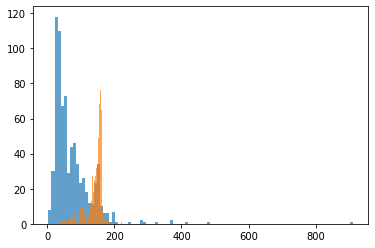

In [19]:
plt.hist(data[data['label']== 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label']== 'spam']['length'], bins = 100, alpha = 0.7)
plt.show

<function matplotlib.pyplot.show>

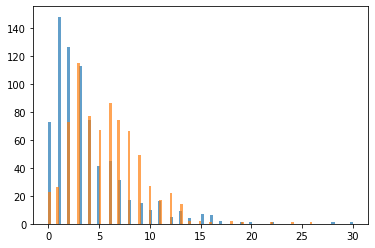

In [20]:
plt.hist(data[data['label']== 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label']== 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show

Divide data into train and test data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train ,X_test, y_train,y_test = train_test_split(data['message'],data['label'],test_size = 0.3, random_state = 0,shuffle = True)

In [25]:
X_train.shape, X_test.shape

((1045,), (449,))

# **Building the model (Random forest)**

# **Predicting the result(Random Forest)**